# Cleaning Exercise

### Region sales Dataset

In [316]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None

In [317]:
# Importing Data

filepath="Sales region.xlsx"
df=pd.read_excel(filepath)

### 1. Exploring Data

In [318]:
df.head()

,Number,Order Date,Region,Name,Item,Units,Unit Cost,Total
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2019-01-06,East,Jones,Pencil,95.0,1.99,189.05
2,2.0,2019-01-23,Central,Kivell,Binder,50.0,19.99,999.50
3,3.0,2019-02-09,Central,Jardine,Pencil,36.0,4.99,179.64
4,4.0,2019-02-26,Central,Gill,Pen,27.0,19.99,539.73


In [319]:
df.shape
f"{df.shape[0]} Rows by {df.shape[1]} Columns"

'50 Rows by 8 Columns'

In [320]:
df.describe()

,Number,Order Date,Units,Unit Cost,Total
count,49.00000,48,48.000000,48.000000,48.000000
mean,25.00000,2019-11-25 17:30:00,50.770833,21.375625,463.835417
min,1.00000,2019-01-06 00:00:00,2.000000,1.290000,9.030000
25%,13.00000,2019-04-30 18:00:00,27.750000,4.490000,146.920000
50%,25.00000,2019-11-16 12:00:00,55.000000,4.990000,309.380000
75%,37.00000,2020-06-04 06:00:00,75.250000,16.990000,640.487500
max,49.00000,2020-12-21 00:00:00,96.000000,275.000000,1879.060000
std,14.28869,NaN,30.241046,47.453622,429.537068


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Number      49 non-null     float64       
 1   Order Date  48 non-null     datetime64[ns]
 2   Region      49 non-null     object        
 3   Name        48 non-null     object        
 4   Item        49 non-null     object        
 5   Units       48 non-null     float64       
 6   Unit Cost   48 non-null     float64       
 7   Total       48 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 3.3+ KB


### 2. Cleaning up the Data!

In [322]:
df

,Number,Order Date,Region,Name,Item,Units,Unit Cost,Total
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2019-01-06,East,Jones,Pencil,95.0,1.99,189.05
2,2.0,2019-01-23,Central,Kivell,Binder,50.0,19.99,999.50
3,3.0,2019-02-09,Central,Jardine,Pencil,36.0,4.99,179.64
4,4.0,2019-02-26,Central,Gill,Pen,27.0,19.99,539.73
5,5.0,2019-03-15,West,Sorvino,Pencil,56.0,2.99,167.44
6,6.0,NaT,East,Jones,Binder,60.0,4.99,299.40
7,7.0,2019-04-18,Central,Andrews,Pencil,75.0,1.99,149.25
8,8.0,2019-05-05,Central,Jardine,Pencil,90.0,NaN,449.10
9,9.0,2019-05-22,West,Thompson,Pencil,32.0,1.99,63.68


In [323]:
# Deleting first empty row

df.drop([0],axis=0,inplace=True)
df.head(1)

,Number,Order Date,Region,Name,Item,Units,Unit Cost,Total
1,1.0,2019-01-06,East,Jones,Pencil,95.0,1.99,189.05


In [324]:
# Renaiming all columns to lower

df.rename(columns=str.lower,inplace=True)
df.sample()

,number,order date,region,name,item,units,unit cost,total
19,19.0,2019-11-08,East,Parent,Pen,15.0,19.99,299.85


In [325]:
# Deleting number column

df.drop("number",axis=1,inplace=True)
df.sample()

,order date,region,name,item,units,unit cost,total
22,2019-12-29,East,Parent,Pen Set,74.0,15.99,1183.26


In [326]:
#Replacing empty spaces in header

df.columns=df.columns.str.replace(" ","_")
df.sample()

,order_date,region,name,item,units,unit_cost,total
16,2019-09-18,East,Jones,Pen Set,16.0,15.99,255.84


In [327]:
# Checking for nulls

df.isnull().sum()

order_date    1
region        0
name          1
item          0
units         1
unit_cost     1
total         1
dtype: int64

#### Cleaning nulls

In [328]:
df["order_date"]=df.order_date.ffill()
df.head(7)

,order_date,region,name,item,units,unit_cost,total
1,2019-01-06,East,Jones,Pencil,95.0,1.99,189.05
2,2019-01-23,Central,Kivell,Binder,50.0,19.99,999.50
3,2019-02-09,Central,Jardine,Pencil,36.0,4.99,179.64
4,2019-02-26,Central,Gill,Pen,27.0,19.99,539.73
5,2019-03-15,West,Sorvino,Pencil,56.0,2.99,167.44
6,2019-03-15,East,Jones,Binder,60.0,4.99,299.40
7,2019-04-18,Central,Andrews,Pencil,75.0,1.99,149.25


In [329]:
filter=df.name.isnull()
df.loc[filter]

,order_date,region,name,item,units,unit_cost,total
21,2019-12-12,Central,NaN,Pencil,67.0,1.29,86.43


In [330]:
df["name"]=df["name"].fillna("no_name")

In [331]:
filter=df.units.isnull()
df.loc[filter]

,order_date,region,name,item,units,unit_cost,total
14,2019-08-15,East,Jones,Pencil,NaN,4.99,174.65


In [332]:
df["units"]=df["units"].fillna(df["total"]/df["unit_cost"])

In [333]:
filter=df.unit_cost.isnull()
df.loc[filter]

,order_date,region,name,item,units,unit_cost,total
8,2019-05-05,Central,Jardine,Pencil,90.0,NaN,449.1


In [334]:
df["unit_cost"]=df["unit_cost"].fillna(df["total"]/df["units"])

In [335]:
filter=df.total.isnull()
df.loc[filter]

,order_date,region,name,item,units,unit_cost,total
17,2019-10-05,Central,Morgan,Binder,28.0,8.99,NaN


In [336]:
df=df.assign(total=lambda x:(x["units"]*x["unit_cost"]))
df

,order_date,region,name,item,units,unit_cost,total
1,2019-01-06,East,Jones,Pencil,95.0,1.99,189.05
2,2019-01-23,Central,Kivell,Binder,50.0,19.99,999.50
3,2019-02-09,Central,Jardine,Pencil,36.0,4.99,179.64
4,2019-02-26,Central,Gill,Pen,27.0,19.99,539.73
5,2019-03-15,West,Sorvino,Pencil,56.0,2.99,167.44
6,2019-03-15,East,Jones,Binder,60.0,4.99,299.40
7,2019-04-18,Central,Andrews,Pencil,75.0,1.99,149.25
8,2019-05-05,Central,Jardine,Pencil,90.0,4.99,449.10
9,2019-05-22,West,Thompson,Pencil,32.0,1.99,63.68
10,2019-06-08,East,Jones,Binder,60.0,8.99,539.40


In [337]:
# Inserting year column

df.insert(1,"year","")
df.sample()

,order_date,year,region,name,item,units,unit_cost,total
49,2019-04-01,,East,Jones,Pen Set,55.0,12.49,686.95


In [338]:
df["year"]=df["order_date"]
df.sample()

,order_date,year,region,name,item,units,unit_cost,total
25,2020-02-18,2020-02-18,East,Jones,Binder,4.0,4.99,19.96


In [339]:
df["year"]=df["year"].astype(str)
df.sample()

,order_date,year,region,name,item,units,unit_cost,total
22,2019-12-29,2019-12-29,East,Parent,Pen Set,74.0,15.99,1183.26


In [340]:
# Extracting year from order date column

def get_date(order_date):
    return order_date.split("-")[0]
df["year"]=df["year"].apply(lambda x:get_date(x))
df.sample()

,order_date,year,region,name,item,units,unit_cost,total
21,2019-12-12,2019,Central,no_name,Pencil,67.0,1.29,86.43


In [341]:
# Cleaning extra spaces

df["item"]=df.item.replace(r'\s+',' ', regex=True)

In [342]:
df["region"]=df.region.str.strip()

In [343]:
# Inserting month name

df.insert(2,"month","")
df.sample()

,order_date,year,month,region,name,item,units,unit_cost,total
5,2019-03-15,2019,,West,Sorvino,Pencil,56.0,2.99,167.44


In [344]:
df["month"]=df["order_date"]
df.sample()

,order_date,year,month,region,name,item,units,unit_cost,total
21,2019-12-12,2019,2019-12-12,Central,no_name,Pencil,67.0,1.29,86.43


In [345]:
df["month"]=df["month"].astype(str)
df.sample()

,order_date,year,month,region,name,item,units,unit_cost,total
16,2019-09-18,2019,2019-09-18,East,Jones,Pen Set,16.0,15.99,255.84


In [346]:
# Extracting month

def get_month(month):
    return month.split("-")[1]
df["month"]=df["month"].apply(lambda x:get_month(x))
df.sample()


,order_date,year,month,region,name,item,units,unit_cost,total
19,2019-11-08,2019,11,East,Parent,Pen,15.0,19.99,299.85


In [347]:
# Inserting month name column

df.insert(3,"month_name","")
df.sample()

,order_date,year,month,month_name,region,name,item,units,unit_cost,total
12,2019-07-12,2019,07,,East,Howard,Binder,29.0,1.99,57.71


In [348]:
df["month_name"]=pd.to_datetime(df["month"],format="%m").dt.month_name()
df.sample()

,order_date,year,month,month_name,region,name,item,units,unit_cost,total
44,2019-01-06,2019,01,January,East,Jones,Pen,96.0,4.99,479.04


### 3. Analyse Data

In [349]:
# Making copies

sales=df.copy()

In [350]:
sales.head(10)

,order_date,year,month,month_name,region,name,item,units,unit_cost,total
1,2019-01-06,2019,01,January,East,Jones,Pencil,95.0,1.99,189.05
2,2019-01-23,2019,01,January,Central,Kivell,Binder,50.0,19.99,999.50
3,2019-02-09,2019,02,February,Central,Jardine,Pencil,36.0,4.99,179.64
4,2019-02-26,2019,02,February,Central,Gill,Pen,27.0,19.99,539.73
5,2019-03-15,2019,03,March,West,Sorvino,Pencil,56.0,2.99,167.44
6,2019-03-15,2019,03,March,East,Jones,Binder,60.0,4.99,299.40
7,2019-04-18,2019,04,April,Central,Andrews,Pencil,75.0,1.99,149.25
8,2019-05-05,2019,05,May,Central,Jardine,Pencil,90.0,4.99,449.10
9,2019-05-22,2019,05,May,West,Thompson,Pencil,32.0,1.99,63.68
10,2019-06-08,2019,06,June,East,Jones,Binder,60.0,8.99,539.40


#### 1.Sales per item

In [351]:
item_sales=sales.groupby(["item"],as_index=False).total.sum().sort_values("total",ascending=False)
item_sales


,item,total
0,Binder,10296.85
3,Pen Set,5166.20
2,Pen,2524.26
1,Desk,2325.00
4,Pencil,2203.51


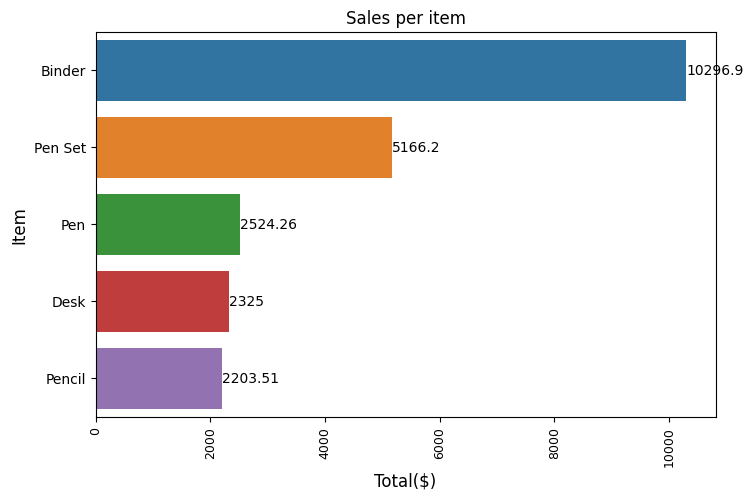

In [352]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x="total",y="item",data=item_sales,hue="item",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales per item")
plt.xlabel("Total($)",fontsize=12)
plt.ylabel("Item",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 2. Sales by year

In [353]:
year_sales=sales.groupby(["year"],as_index=False).total.sum()
year_sales

,year,total
0,2019,12146.28
1,2020,10369.54


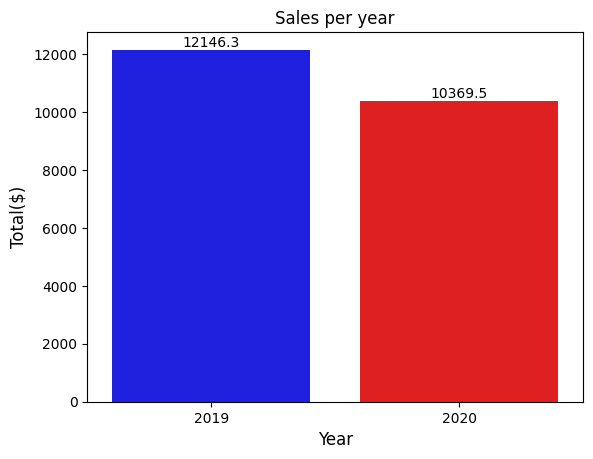

In [354]:
ax=sns.barplot(x="year",y="total",data=year_sales,hue="year",palette=["b","r"])
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales per year")
plt.xlabel("Year",fontsize=12)
plt.ylabel("Total($)",fontsize=12)
plt.show()

#### 3.Sales by Region

In [355]:
region_sales=sales.groupby(["region"],as_index=False).total.sum()
region_sales

,region,total
0,Central,12551.64
1,East,7477.46
2,West,2486.72


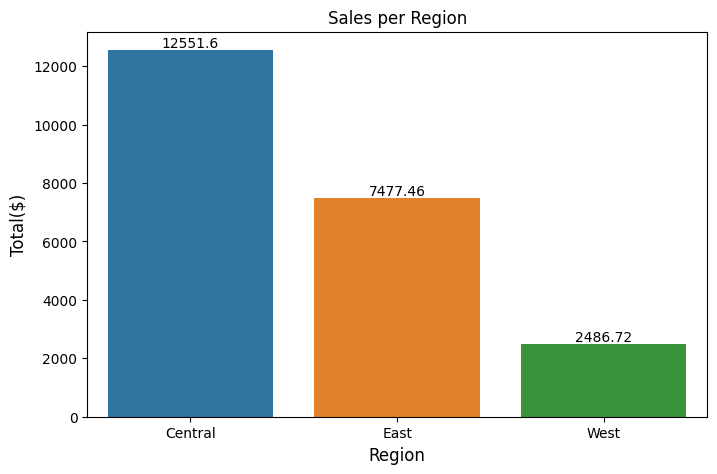

In [356]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x="region",y="total",data=region_sales,hue="region",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales per Region")
plt.xlabel("Region",fontsize=12)
plt.ylabel("Total($)",fontsize=12)
plt.show()

#### 4. Sales per month.

In [357]:
month_sales=sales.groupby(["year","month","month_name"],as_index=False).total.sum().sort_values(["year","month"],ascending=[True,True])
month_sales

,year,month,month_name,total
0,2019,01,January,1735.96
1,2019,02,February,2063.57
2,2019,03,March,776.22
3,2019,04,April,836.20
4,2019,05,May,512.78
5,2019,06,June,988.50
6,2019,07,July,1676.90
7,2019,08,August,174.65
8,2019,09,September,505.84
9,2019,10,October,827.08


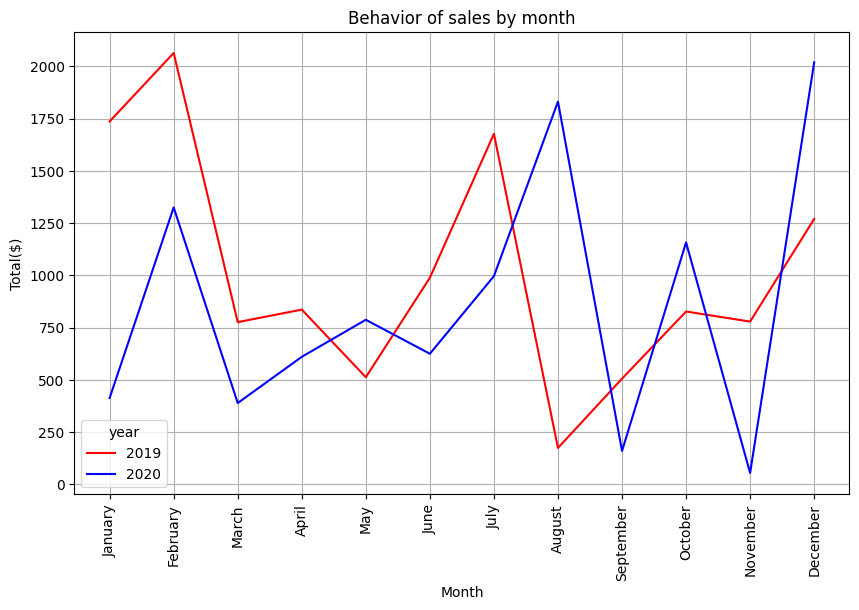

In [358]:
plt.figure(figsize=(10,6))
sns.lineplot(x="month_name",y="total",data=month_sales,hue="year",palette=["r","b"])
plt.xlabel("Month")
plt.ylabel("Total($)")
plt.title("Behavior of sales by month")
plt.xticks(rotation=90)
plt.grid()
plt.show()

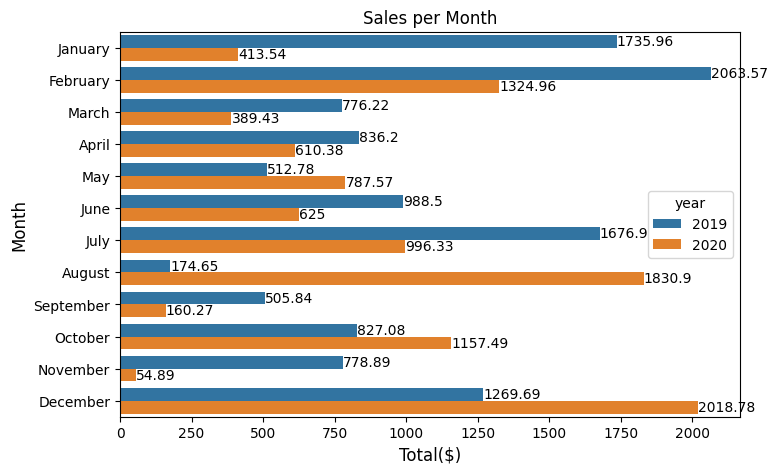

In [359]:
plt.figure(figsize=(8,5))
ax=sns.barplot(x="total",y="month_name",data=month_sales,hue="year",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Sales per Month")
plt.xlabel("Total($)",fontsize=12)
plt.ylabel("Month",fontsize=12)
plt.show()